In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
movies = pd.read_csv(path_data+'tmdb_5000_movies.csv')
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [10]:
# exercise 01

"""
Introducing the movie database

Throughout this chapter, you'll be working with the TMDb (The Movie Database). This contains metadata on around 5000 movies.

The dataset is loaded and available to you as movies.

Your main objective is to predict movie revenue - more specifically, log-revenue, which is the normalized version of the revenue feature.

Use the .describe() method to explore this feature. You can also inspect the histogram to the right. What can you conclude?
"""

# Instructions

"""
Possible answers:
    
    The average log-revenue is around 16.77.
    
    There are many zero values.
    
    There many extreme values.
"""

# solution

movies['log-revenue'] = np.log(movies.revenue)
print(movies.describe())

#----------------------------------#

# Conclusion

"""
That's it! It appears that even after the log-transformation, there are many zero values, around 30% to be more precise.
"""

             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  log-revenue  
count   4803.000000   4803.000000  4803.000000  
mean       6.092172    690.217989         -inf  
std        1.194612   1234.585891          NaN  
min        0.000000      0.000000         -inf  
25%        5.600000     54.000000          NaN  
50%

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


"\nThat's it! It appears that even after the log-transformation, there are many zero values, around 30% to be more precise.\n"

In [12]:
# exercise 02

"""
Exploring movie features

In the rest of this chapter, you will use boosting algorithms to build models that predict the log-revenue of movies based on the following features: 'budget', 'popularity', 'runtime', 'vote_average', and 'vote_count'. There are many more features, but these will be of primary interest. Having explored the target in the previous exercise, it's now time to explore these features!

The features of interest have been loaded into the features variable. Use the .describe() method to explore it. What do you notice?
"""

# Instructions

"""
Possible answers
    
    The only feature with missing values is 'runtime'. {Answer}
    
    All the features are on the same scale.
    
    Some of the features contain negative values.

"""

# solution

print(movies[['budget', 'popularity', 'runtime', 'vote_average','vote_count']].info())
print(movies[['budget', 'popularity', 'runtime', 'vote_average','vote_count']].describe())
#----------------------------------#

# Conclusion

"""
Correct! The only feature with missing values is 'runtime'. But there are only two missing values, so it's not a critical issue. However, all features are on different scales, and therefore need to be normalized.
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4803 non-null   int64  
 1   popularity    4803 non-null   float64
 2   runtime       4801 non-null   float64
 3   vote_average  4803 non-null   float64
 4   vote_count    4803 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 187.7 KB
None
             budget   popularity      runtime  vote_average    vote_count
count  4.803000e+03  4803.000000  4801.000000   4803.000000   4803.000000
mean   2.904504e+07    21.492301   106.875859      6.092172    690.217989
std    4.072239e+07    31.816650    22.611935      1.194612   1234.585891
min    0.000000e+00     0.000000     0.000000      0.000000      0.000000
25%    7.900000e+05     4.668070    94.000000      5.600000     54.000000
50%    1.500000e+07    12.921594   103.000000      6.200000    235.000000
75%    4.000000e+0

"\nCorrect! The only feature with missing values is 'runtime'. But there are only two missing values, so it's not a critical issue. However, all features are on different scales, and therefore need to be normalized.\n"

In [16]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [20]:
X = movies[['budget', 'popularity', 'runtime', 'vote_average','vote_count']].fillna(0)
y = movies['log-revenue'].fillna(0).replace(-np.inf, y.max())

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# exercise 03

"""
Predicting movie revenue

Let's begin the challenge of predicting movie revenue by building a simple linear regression to estimate the log-revenue of movies based on the 'budget' feature. The metric you will use here is the RMSE (root mean squared error). To calculate this using scikit-learn, you can use the mean_squared_error() function from the sklearn.metrics module and then take its square root using numpy.

The movies dataset has been loaded for you and split into train and test sets. Additionally, the missing values have been replaced with zeros. We also standardized the input feature by using StandardScaler(). Check out DataCamp's courses on cleaning data and feature engineering if you want to learn more about preprocessing for machine learning.
"""

# Instructions

"""

    
    Instantiate the default LinearRegression model.
    
    Calculate the predictions on the test set.
    
    Calculate the RMSE. The mean_squared_error() function requires two arguments: y_test, followed by the predictions.

"""

# solution

# Build and fit linear regression model
reg_lm = LinearRegression()
reg_lm.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_lm.predict(X_test)

# Evaluate the performance using the RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: {:.3f}'.format(rmse))

#----------------------------------#

# Conclusion

"""
Well done! This simple linear regression model provides a RMSE of around 7.34. Let's try and boost the model now!
"""

RMSE: 2.561


"\nWell done! This simple linear regression model provides a RMSE of around 7.34. Let's try and boost the model now!\n"

In [3]:
# exercise 04

"""
Boosting for predicted revenue

The initial model got an RMSE of around 7.34. Let's see if we can improve this using an iteration of boosting.

You'll build another linear regression, but this time the target values are the errors from the base model, calculated as follows:

y_train_error = pred_train - y_train
y_test_error = pred_test - y_test

For this model you'll use 'popularity' feature instead, hoping that it can provide more informative patterns than with the 'budget' feature alone. This is available to you as X_train_pop and X_test_pop. As in the previous exercise, the input features have been standardized for you.
"""

# Instructions

"""

    
    Fit a linear regression model to the previous errors using X_train_pop and y_train_error.
    
    Calculate the predicted errors on the test set, X_test_pop.
    
    Calculate the RMSE, like in the previous exercise, using y_test_error and pred_error.

"""

# solution

# Fit a linear regression model to the previous errors
reg_error = LinearRegression()
reg_error.fit(X_train_pop, y_train_error)

# Calculate the predicted errors on the test set
pred_error = reg_error.predict(X_test_pop)

# Evaluate the updated performance
rmse_error = np.sqrt(mean_squared_error(y_test_error, pred_error))
print('RMSE: {:.3f}'.format(rmse_error))

#----------------------------------#

# Conclusion

"""
Excellent! Fitting a linear regression to try to fix the errors of the previous model provided a lower RMSE of around 7.28. This is boosting in action!
"""

'\n\n'

In [27]:
# exercise 05

"""
Your first AdaBoost model

In the previous lesson you built models to predict the log-revenue of movies. You started with a simple linear regression and got an RMSE of 7.34. Then, you tried to improve it with an iteration of boosting, getting to a lower RMSE of 7.28.

In this exercise, you'll build your first AdaBoost model - an AdaBoostRegressor - in an attempt to improve performance even further.

The movies dataset has been loaded and split into train and test sets. Here you'll be using the 'budget' and 'popularity' features, which were already standardized for you using StandardScaler() from sklearn.preprocessing module.
"""

# Instructions

"""

    
    Instantiate the default linear regression model.
    
    Build and fit an AdaBoostRegressor, using the linear regression as the base model and 12 estimators.
    
    Calculate the predictions on the test set.

"""

# solution
from sklearn.ensemble import AdaBoostRegressor
# Instantiate the default linear regression model
reg_lm = LinearRegression()

# Build and fit an AdaBoost regressor
reg_ada = AdaBoostRegressor(reg_lm, n_estimators=12, random_state=500)
reg_ada.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_ada.predict(X_test)

# Evaluate the performance using the RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: {:.3f}'.format(rmse))

#----------------------------------#

# Conclusion

"""
Good job! Your first AdaBoost ensemble model produced a RMSE of around 7.18 - better than the custom model!
"""

RMSE: 2.632


'\nGood job! Your first AdaBoost ensemble model produced a RMSE of around 7.18 - better than the custom model!\n'

In [29]:
# exercise 06

"""
Tree-based AdaBoost regression

AdaBoost models are usually built with decision trees as the base estimators. Let's give this a try now and see if model performance improves even further.

We'll use twelve estimators as before to have a fair comparison. There's no need to instantiate the decision tree as it is the base estimator by default.
"""

# Instructions

"""

    Build and fit an AdaBoostRegressor using 12 estimators. You do not have to specify a base estimator.
    
    Calculate the predictions on the test set.

"""

# solution

# Build and fit a tree-based AdaBoost regressor
reg_ada = AdaBoostRegressor(n_estimators=12, random_state=500)
reg_ada.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_ada.predict(X_test)

# Evaluate the performance using the RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: {:.3f}'.format(rmse))

#----------------------------------#

# Conclusion

"""
Amazing! Using a decision tree instead of a linear regression as the base estimator reduced the RMSE to around 5.44!
"""

RMSE: 2.695


'\nAmazing! Using a decision tree instead of a linear regression as the base estimator reduced the RMSE to around 5.44!\n'

In [32]:
# exercise 07

"""
Making the most of AdaBoost

As you have seen, for predicting movie revenue, AdaBoost gives the best results with decision trees as the base estimator.

In this exercise, you'll specify some parameters to extract even more performance. In particular, you'll use a lower learning rate to have a smoother update of the hyperparameters. Therefore, the number of estimators should increase. Additionally, the following features have been added to the data: 'runtime', 'vote_average', and 'vote_count'.
"""

# Instructions

"""

    Build an AdaBoostRegressor using 100 estimators and a learning rate of 0.01.

    Fit reg_ada to the training set and calculate the predictions on the test set.

"""

# solution

# Build and fit an AdaBoost regressor
reg_ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.01, random_state=500)
reg_ada.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_ada.predict(X_test)

# Evaluate the performance using the RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: {:.3f}'.format(rmse))

#----------------------------------#

# Conclusion

"""
Good job! Improving our model could get us to a RMSE close to 5.15!
"""

RMSE: 2.312


'\nGood job! Improving our model could get us to a RMSE close to 5.15!\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None                         App Translated_Review Sentiment  Sentiment_Polarity  \
count                 64295             37427     37432        37432.000000   
unique                 1074             27994         3                 NaN   
top     Angry Birds Classic              Good  Positive                 NaN   
freq                    320               247     23998                 NaN   
mean                    NaN               NaN       NaN            0.

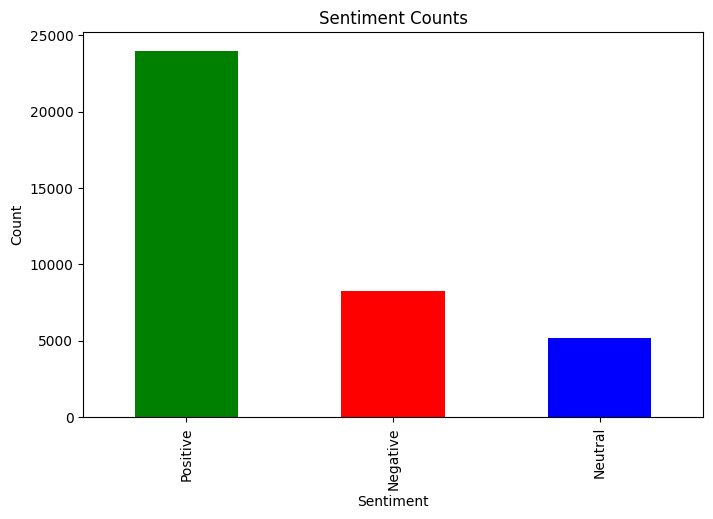

'\nCorrect! After checking the head of the target and the frequency of values we can see that there are many missing reviews.\n'

In [36]:
# exercise 08

"""
Revisiting Google app reviews

We're now going to leverage gradient boosting to perform sentiment analysis!

Remember the app ratings dataset from the first chapter? We'll now work with a related dataset for user reviews. This dataset contains the first 100 most relevant reviews for each app. Our goal is to build a model based on these reviews that predicts the Sentiment as being 'Positive', 'Neutral', or 'Negative'.

The dataset is available to you as reviews, and the target here is the 'Sentiment' column. Explore the data in the IPython Shell, and then select the correct statement from the options below.
"""

# Instructions

"""
Possible answers:

    Most of the reviews are 'Negative'.

    There are some reviews with NaN values. {Answer}

    The target is balanced.

"""

# solution

reviews = pd.read_csv(path_data+'googleplaystore_user_reviews.csv')
print(reviews.info(), reviews.describe(include='all'))

# Count the occurrences of each sentiment
sentiment_counts = reviews['Sentiment'].value_counts()

# Plot the count using matplotlib
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#----------------------------------#

# Conclusion

"""
Correct! After checking the head of the target and the frequency of values we can see that there are many missing reviews.
"""

In [8]:
# exercise 09

"""
Sentiment analysis with GBM

Let's now use scikit-learn's GradientBoostingClassifier on the reviews dataset to predict the sentiment of a review given its text.

We will not pass the raw text as input for the model. The following pre-processing has been done for you:

    Remove reviews with missing values.
    Select data from the top 5 apps.
    Select a random subsample of 500 reviews.
    Remove "stop words" from the reviews.
    Transform the reviews into a matrix, in which each feature represents the frequency of a word in a review.

Do you want a deeper understanding of text mining? Then go check the course Introduction to Natural Language Processing in Python!
"""

# Instructions

"""

    Build a GradientBoostingClassifier with 100 estimators and a learning rate of 0.1.
   
    Calculate the predictions on the test set.
   
    Compute the accuracy to evaluate the model.
   
    Calculate and print the confusion matrix.

"""

# solution

# Build and fit a Gradient Boosting classifier
clf_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=500)
clf_gbm.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = clf_gbm.predict(X_test)

# Evaluate the performance based on the accuracy
acc = accuracy_score(y_test, pred)
print('Accuracy: {:.3f}'.format(acc))

# Get and show the Confusion Matrix
cm = confusion_matrix(y_test, pred)
print(cm)

#----------------------------------#

# Conclusion

"""
Positive review for you! The gradient boosting classifier was able to predict the sentiment of the reviews with an accuracy of 92%!
"""

'\n\n'

In [9]:
# exercise 10

"""
Movie revenue prediction with CatBoost

Let's finish up this chapter on boosting by returning to the movies dataset! In this exercise, you'll build a CatBoostRegressor to predict the log-revenue. Remember that our best model so far is the AdaBoost model with a RMSE of 5.15.

Will CatBoost beat AdaBoost? We'll try to use a similar set of parameters to have a fair comparison.

Recall that these are the features we have used so far: 'budget', 'popularity', 'runtime', 'vote_average', and 'vote_count'. catboost has been imported for you as cb.
"""

# Instructions

"""

    Build and fit a CatBoostRegressor using 100 estimators, a learning rate of 0.1, and a max depth of 3.
    Calculate the predictions for the test set and print the RMSE.

"""

# solution

import catboost as cb

# Build and fit a CatBoost regressor
reg_cat = cb.CatBoostRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=500)
reg_cat.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_cat.predict(X_test)

# Evaluate the performance using the RMSE
rmse_cat = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE (CatBoost): {:.3f}'.format(rmse_cat))

#----------------------------------#

# Conclusion

"""
Excellent! The CatBoost regressor was able to predict movie revenue with a RMSE of around 5.12, an improvement over the previous 5.15. CatBoost trained faster as well!
"""

'\n\n'

In [ ]:
# exercise 11

"""
Boosting contest: Light vs Extreme

While the performance of the CatBoost model is relatively good, let's try two other flavors of boosting and see which performs better: the "Light" or the "Extreme" approach.

CatBoost is highly recommended when there are categorical features. In this case, all features are numeric, therefore one of the other approaches might produce better results.

As we are building regressors, we'll use an additional parameter, objective, which specifies the learning function to be used. To apply a squared error, we'll set objective to 'reg:squarederror' for XGBoost and 'mean_squared_error' for LightGBM.

In addition, we'll specify the parameter n_jobs for XGBoost to improve its computation runtime.
"""

# Instructions

"""

    Build an XGBRegressor using the parameters: max_depth = 3, learning_rate = 0.1, n_estimators = 100, and n_jobs=2.
    Build an LGBMRegressor using the parameters: max_depth = 3, learning_rate = 0.1, and n_estimators = 100.

"""

# solution

# Build and fit an XGBoost regressor
reg_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, n_jobs=2, objective='reg:squarederror', random_state=500)
reg_xgb.fit(X_train, y_train)

# Build and fit a LightGBM regressor
reg_lgb = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, objective='mean_squared_error', seed=500)
reg_lgb.fit(X_train, y_train)

# Calculate the predictions and evaluate both regressors
pred_xgb = reg_xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
pred_lgb = reg_lgb.predict(X_test)
rmse_lgb = np.sqrt(mean_squared_error(y_test, pred_lgb))

print('Extreme: {:.3f}, Light: {:.3f}'.format(rmse_xgb, rmse_lgb))

#----------------------------------#

# Conclusion

"""
Pretty tight! While XGBoost got a better score, LightGBM is faster and lighter. CatBoost was a good contestant as well!
"""